In [38]:
# Import necessary libraries
import requests as r
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import io


# Request data and print status code
data1 = r.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2017-01-01&minmagnitude=4")
data2 = r.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2018-01-01&minmagnitude=4")
data3 = r.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2019-01-01&minmagnitude=4")
data4 = r.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-01T23:59:59&minmagnitude=4")

print("Data1: ", data1.status_code)
print("Data2: ", data2.status_code)
print("Data3: ", data3.status_code)
print("Data4: ", data4.status_code)

data1 = data1.content
data2 = data2.content
data3 = data3.content
data4 = data4.content

Data1:  200
Data2:  200
Data3:  200
Data4:  200


In [39]:
dfdata1 = pd.read_csv(io.StringIO(data1.decode('utf-8')))
dfdata2 = pd.read_csv(io.StringIO(data2.decode('utf-8')))
dfdata3 = pd.read_csv(io.StringIO(data3.decode('utf-8')))
dfdata4 = pd.read_csv(io.StringIO(data4.decode('utf-8')))

frames = [dfdata1, dfdata2, dfdata3, dfdata4]

dfdatafull = pd.concat(frames)

# Question 1
### Use describe to get the basic statistics of all the columns

In [40]:
dfdatafull.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,53018.000000,53018.000000,53018.000000,53018.000000,399.000000,52170.000000,52125.000000,53018.000000,52576.000000,53018.000000,51241.000000,51444.000000
mean,1.912031,33.876204,94.121676,4.527196,44.784461,110.644220,3.708897,0.826542,8.744613,5.448420,0.121066,42.233594
std,28.956146,124.361493,147.819590,0.398520,33.195457,51.056839,4.736371,0.263081,3.660659,4.205371,0.065079,61.332849
min,-79.983700,-179.998600,-1.010000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.491625,-74.494500,10.000000,4.300000,23.000000,73.000000,1.170000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.325150,93.836300,33.755000,4.500000,36.000000,105.000000,2.380000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.298300,141.889950,106.047500,4.700000,61.500000,142.000000,4.396000,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,941.000000


# Question 2
### Get the top 10 earthquakes by magnitude

In [41]:
dfdatafull.sort_values(['mag'], ascending = False).head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
4525,2017-09-08T04:49:19.180Z,15.0222,-93.8993,47.39,8.2,mww,NaN,22.0,0.944,1.22,...,2019-09-12T03:25:23.535Z,"101km SSW of Tres Picos, Mexico",earthquake,6.2,3.7,0.058,29.0,reviewed,us,us
6256,2018-08-19T00:19:40.670Z,-18.1125,-178.1530,600.00,8.2,mww,NaN,13.0,3.630,0.79,...,2019-08-19T06:18:42.402Z,"286km NNE of Ndoi Island, Fiji",earthquake,9.6,1.9,0.045,47.0,reviewed,us,us
4556,2019-05-26T07:41:15.073Z,-5.8119,-75.2697,122.57,8.0,mww,NaN,17.0,3.180,0.84,...,2019-10-20T00:29:23.662Z,"78km SE of Lagunas, Peru",earthquake,7.0,4.0,0.036,75.0,reviewed,us,us
5168,2018-09-06T15:49:18.710Z,-18.4743,179.3502,670.81,7.9,mww,NaN,12.0,1.431,1.07,...,2019-04-23T04:45:27.592Z,"102km ESE of Suva, Fiji",earthquake,9.5,2.8,0.025,157.0,reviewed,us,us
13823,2018-01-23T09:31:40.890Z,56.0039,-149.1658,14.06,7.9,mww,NaN,30.0,2.585,0.77,...,2019-07-01T15:34:15.502Z,"280km SE of Kodiak, Alaska",earthquake,6.0,2.8,0.034,81.0,reviewed,us,us
789,2016-12-17T10:51:10.500Z,-4.5049,153.5216,94.54,7.9,mww,NaN,13.0,1.389,0.97,...,2018-10-17T21:50:55.380Z,"54km E of Taron, Papua New Guinea",earthquake,7.3,3.8,NaN,NaN,reviewed,us,us
12311,2017-01-22T04:30:22.960Z,-6.2464,155.1718,135.00,7.9,mww,NaN,9.0,3.625,1.22,...,2018-10-17T21:53:19.164Z,"35km WNW of Panguna, Papua New Guinea",earthquake,7.3,1.8,0.042,54.0,reviewed,us,us
1335,2016-12-08T17:38:46.280Z,-10.6812,161.3273,40.00,7.8,mww,NaN,13.0,1.836,0.88,...,2018-10-17T21:50:46.404Z,"69km WSW of Kirakira, Solomon Islands",earthquake,8.3,1.8,NaN,NaN,reviewed,us,us
11284,2016-04-16T23:58:36.980Z,0.3819,-79.9218,20.59,7.8,mww,NaN,15.0,1.440,0.94,...,2019-10-15T14:06:57.770Z,"27km SSE of Muisne, Ecuador",earthquake,5.7,3.2,NaN,NaN,reviewed,us,us
2674,2016-11-13T11:02:56.340Z,-42.7373,173.0540,15.11,7.8,mww,NaN,21.0,0.481,0.56,...,2019-04-15T21:55:36.454Z,"54km NNE of Amberley, New Zealand",earthquake,4.6,3.2,NaN,NaN,reviewed,us,us


# Question 3
### Handle all Null/empty data by filling it with zeros

In [42]:
dfdatafull.fillna(0, inplace = True)

In [43]:
dfdatafull.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T21:57:40.910Z,10.0165,126.2526,54.74,4.7,mb,0.0,94.0,3.002,0.67,...,2017-03-23T22:52:11.040Z,"19km E of San Isidro, Philippines",earthquake,9.1,7.3,0.069,64.0,reviewed,us,us
1,2016-12-31T21:43:55.590Z,-5.9993,153.7578,10.00,5.1,mb,0.0,65.0,2.397,0.73,...,2017-03-23T22:52:11.040Z,"187km SSE of Taron, Papua New Guinea",earthquake,8.1,1.8,0.062,84.0,reviewed,us,us
2,2016-12-31T21:08:02.160Z,26.0580,128.7113,8.26,4.8,mb,0.0,77.0,0.869,0.54,...,2017-03-23T22:52:11.040Z,"89km ESE of Haebaru, Japan",earthquake,5.2,4.8,0.076,54.0,reviewed,us,us
3,2016-12-31T19:58:49.130Z,-17.3728,-173.8997,92.92,4.7,mb,0.0,68.0,4.138,0.89,...,2017-03-23T22:52:11.040Z,"141km N of Neiafu, Tonga",earthquake,12.7,7.1,0.080,48.0,reviewed,us,us
4,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,0.0,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us


# Question 4
### Find the top 10 places where the strongest earthquakes occurred

In [44]:
# Regex also used for question 5
cityCountry = r'(?<=of\s)(.*)'

In [45]:
strongest = dfdatafull.sort_values(['mag'], ascending = False)

In [46]:
strongest['place'].str.extract(cityCountry).head(10)

,0
4525,"Tres Picos, Mexico"
6256,"Ndoi Island, Fiji"
4556,"Lagunas, Peru"
5168,"Suva, Fiji"
13823,"Kodiak, Alaska"
789,"Taron, Papua New Guinea"
12311,"Panguna, Papua New Guinea"
1335,"Kirakira, Solomon Islands"
11284,"Muisne, Ecuador"
2674,"Amberley, New Zealand"


# Question 5
### Find the top 10 places where the weakest earthquakes occurred

In [47]:
weakest = dfdatafull.sort_values(['mag'], ascending = True)

In [48]:
weakest['place'].str.extract(cityCountry).head(10)

,0
13886,"Great Swan Island, Honduras"
6651,"Chichi-shima, Japan"
6649,"San Pedro de Atacama, Chile"
6646,"Upper Hutt, New Zealand"
6637,"Kirakira, Solomon Islands"
6617,"Manokwari, Indonesia"
6614,"Padangsidempuan, Indonesia"
6597,"Kashi, China"
6595,"Jatiklampok, Indonesia"
9020,"Nebe, Indonesia"


# Question 6
### On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:​ Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. Please add labels and colors to the plot.

In [49]:
sixteen = dfdata1['mag']
seventeen = dfdata2['mag']
eighteen = dfdata3['mag']
nineteen = dfdata4['mag']

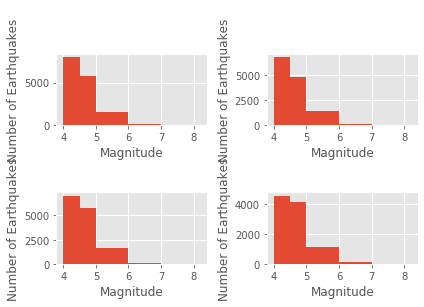

In [50]:
hgram, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.flatten()
bin_set = [4, 4.5, 5, 6, 7, dfdatafull['mag'].max()]
xlabel = "Magnitude"
ylabel = "Number of Earthquakes"

ax1.hist(sixteen, bin_set)
ax1.set_title("2016")
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax2.hist(seventeen, bin_set)
ax2.set_title("2017")
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
               
ax3.hist(eighteen, bin_set)
ax3.set_title("2018")
ax3.set_xlabel(xlabel)
ax3.set_ylabel(ylabel)

ax4.hist(nineteen, bin_set)
ax4.set_title("2019")
ax4.set_xlabel(xlabel)
ax4.set_ylabel(ylabel)

hgram.suptitle("Earthquake Count by Magnitude per Year", y = 1.05, fontsize = 14)
plt.tight_layout();

# Question 7
### Find the 10 countries with the highest number of earthquakes

In [51]:
country = r'(?<=,\s)(.*)'

In [52]:
pd.value_counts(dfdatafull['place'].str.extract(country).values.flatten()).head(10)

Indonesia           6573
Japan               3422
Papua New Guinea    3091
Fiji                2530
New Zealand         2392
Chile               2290
Philippines         2086
Alaska              1838
Russia              1758
Tonga               1569
dtype: int64

# Question 8
### Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? Please add labels and colors to the plot.

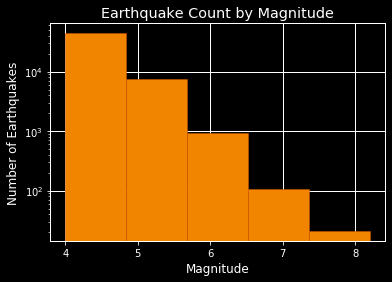

In [53]:
plt.style.use('dark_background')
plt.hist(dfdatafull['mag'], bins = 5, color = '#F28500',
        edgecolor = '#CC5500', log = True)
plt.title("Earthquake Count by Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Number of Earthquakes");

The relationship between the magnitude of earthquakes versus the count by the histogram, shows that as magnitude increases then the number of earthquakes decreases.

# Question 9
### Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? Please add labels and colors to the plot.

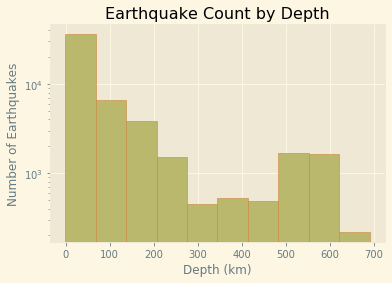

In [54]:
plt.style.use("Solarize_Light2")
plt.hist(dfdatafull['depth'], color = '#BAB86C',
        edgecolor = '#CD7F32', log = True)
plt.title("Earthquake Count by Depth", color = 'black')
plt.xlabel("Depth (km)")
plt.ylabel("Number of Earthquakes");

The relationship between the depth of earthquakes versus the count by the histogram, shows that the number of earthquakes steadily decline as the depth increases then reaches a plateau around 300km. The number of earthquakes double around 500km, hits a small plateau, then drastically decreases.

# Question 10
### Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Please add labels and colors to the plot.

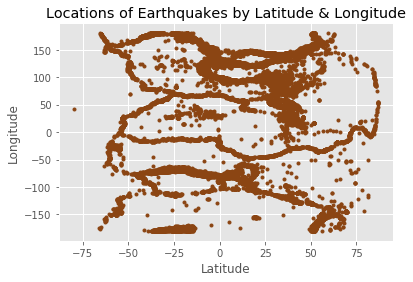

In [55]:
plt.style.use("ggplot")
x = dfdatafull['latitude']
y = dfdatafull['longitude']
plt.plot(x, y, '.', color = '#8B4513')
plt.title("Locations of Earthquakes by Latitude & Longitude", color = 'black')
plt.xlabel("Latitude")
plt.ylabel("Longitude");